---
---

Milestone 1

Nama    : Verren Monica

Batch   : RMT - 038

Dashboard link: [click here](https://public.tableau.com/app/profile/verren.monica/viz/milestones_db/Visualization?publish=yes)

---
---

# 1. Identifikasi Masalah

**Topik Permasalahan**: 

Menganalisa data penjualan gadget elektronik untuk meningkatkan penjualan di tahun 2025.

**Latar Belakang**:

Pemilik toko gadget elektronik ingin meningkatkan penjualan tahun 2025 dengan analisa tren produk. Pemilik toko juga ingin memahami bagaimana customer demographics dan customer purchase behaviour memiliki kolerasi dengan penjualan.

**Problem Statement**:

Specific: Menganalisis tren penjualan untuk menentukan strategi yang efektif dalam meningkatkan penjualan di tahun 2025.

Measurable: Mengidentifikasi customer behaviour, tren penjualan perbulan, rating produk, untuk mendukung tujuan meningkatkan penjualan sebesar 20% di tahun 2025.

Achievable: Menggunakan data penjualan periode September 2023 sampai September 2024.

Relevant: Mendukung keinginan pemilik toko untuk meningkatkan penjualan, customer satisfaction, optimasi stok dan meningkatkan penilaian produk.

Time-bound: Menyelesaikan analisis dalam 1 minggu untuk diberikan kepada pemilik toko sehingga dapat segera dilakukan evaluasi dan pengambilan keputusan untuk meningkatkan penjualan 2025.

Melakukan analisa tren penjualan periode September 2023 sampai September 2024. Hasilnya akan membantu pemilik toko mengambil keputusan strategis untuk meningkatkan penjualan sebesar 20% di tahun 2025. Analisis ini mencakup customer behaviour, tren penjualan setiap bulan, dan rating produk yang dijual. Proses ini ditargetkan selesai dalam 1 minggu agar pemilik toko dapat segera mengevaluasi dan menerapkan langkah perbaikan.


**Penjabaran Masalah**:

- Berapa persentase jumlah cancelled order dan completed order? Apakah customer cancel order dikarenakan total amount yang tinggi?
- Metode pembayaran apa yang paling sering dipilih customer?
- Metode pengiriman apa yang paling sering dipilih customer?
- Bagaimana tren penjualan setiap bulannya?
- Bagaimana tren produk setiap bulannya? Berapa rata-rata produk terjual tiap bulan berdasarkan kategorinya?
- Apakah ada perbedaan total spending tiap Gender?
- Berapa rata-rata penjualan setiap bulannya? 
- Bagaimana distribusi usia customer?
- Bagaimana rating tiap produk?
- Add-on apa yang paling diminati customer?
- Apakah ada korelasi antara kategori usia dan kategori produk?
- Apakah ada korelasi antara loyalty member dan total spending?


# 2. Data Loading

Data set source: [click here](https://www.kaggle.com/datasets/cameronseamons/electronic-sales-sep2023-sep2024)

In [88]:
# Import library yang akan digunakan
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

In [89]:
# Menampilkan dataset yang digunakan
df = pd.read_csv("electronicsales.csv")
df.head(10)

,Customer ID,Age,Gender,Loyalty Member,Product Type,SKU,Rating,Order Status,Payment Method,Total Price,Unit Price,Quantity,Purchase Date,Shipping Type,Add-ons Purchased,Add-on Total
0,1000,53,Male,No,Smartphone,SKU1004,2,Cancelled,Credit Card,5538.33,791.19,7,3/20/2024,Standard,"Accessory,Accessory,Accessory",40.21
1,1000,53,Male,No,Tablet,SKU1002,3,Completed,Paypal,741.09,247.03,3,4/20/2024,Overnight,Impulse Item,26.09
2,1002,41,Male,No,Laptop,SKU1005,3,Completed,Credit Card,1855.84,463.96,4,10/17/2023,Express,NaN,0.00
3,1002,41,Male,Yes,Smartphone,SKU1004,2,Completed,Cash,3164.76,791.19,4,8/9/2024,Overnight,"Impulse Item,Impulse Item",60.16
4,1003,75,Male,Yes,Smartphone,SKU1001,5,Completed,Cash,41.50,20.75,2,5/21/2024,Express,Accessory,35.56
5,1004,41,Female,No,Smartphone,SKU1001,5,Completed,Credit Card,83.00,20.75,4,5/26/2024,Standard,"Impulse Item,Accessory",65.78
6,1005,25,Female,No,Smartwatch,SKU1003,3,Completed,Paypal,7603.47,844.83,9,1/30/2024,Overnight,NaN,0.00
7,1005,25,Female,No,Laptop,SKU1005,3,Completed,Debit Card,4175.64,463.96,9,6/24/2024,Overnight,"Extended Warranty,Extended Warranty",75.33
8,1006,24,Male,No,Smartphone,SKU1004,2,Cancelled,Debit Card,5538.33,791.19,7,10/3/2023,Standard,Impulse Item,43.05
9,1006,24,Male,Yes,Laptop,SKU1005,3,Completed,Cash,4175.64,463.96,9,1/1/2024,Express,NaN,0.00


Dari data yang ditampilkan, berikut adalah penjelasan masing-masing kolom:

1. Customer ID: Unique ID untuk masing-masing customer

2. Age: Umur customer

3. Gender: Jenis kelamin customer (Female or Male)

4. Loyalty Member: Apakah customer merupakan member (Yes/No)

5. Product Type: Tipe produk yang dijual

6. SKU: Unique ID untuk tiap produk

7. Rating: Rating pelanggan terhadap produk 

8. Order status: Status order pelanggan (Completed or Cancelled)

9. Payment Method: Metode pembayaran customer

10. Total Price: Total pembelian customer (Unit Price * Quantity)

11. Unit Price: Harga per produk (dollar)

12. Quantity: Jumlah produk yang dibeli oleh customer

13. Purchase Date: Tanggal pembelian dengan format YYYY-MM-DD

14. Shipping Type: Tipe pengiriman produk yang dipilih oleh customer

15. Add-ons Purchased: List additional item yang dibeli oleh customer

16. Add-on Total: Total harga add-on yang dibeli oleh customer


Dari data tesebut belum ada kolom total nominal yang harus dibayar customer (Total Price + Add-on Total) maka, akan dilakukan penambahan kolom. Oleh karena itu akan dilakukan penggantian nama kolom, `Total Price` menjadi `Amount Product`, `Add-on Total` menjadi `Amount Add-on` dan kolom baru berisi total nominal akan diberi nama `Total Amount`. Hal ini dilakukan agar penamaan tiap kolom lebih jelas dan tidak ambigu.

Dalam melakukan pembelian, customer dapat memilih untuk membeli add-ons. Ada customer yang tidak membeli add-ons sama sekali dan ada customer yang membeli hingga 3 add-ons. Kolom add-ons akan dipisah menjadi 3 kolom untuk membantu mengetahui add-ons apa yang diminati oleh customer. Untuk customer yang tidak membeli Add-on akan diisi dengan "None".

In [90]:
# Menampilkan informasi dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Customer ID        20000 non-null  int64  
 1   Age                20000 non-null  int64  
 2   Gender             19999 non-null  object 
 3   Loyalty Member     20000 non-null  object 
 4   Product Type       20000 non-null  object 
 5   SKU                20000 non-null  object 
 6   Rating             20000 non-null  int64  
 7   Order Status       20000 non-null  object 
 8   Payment Method     20000 non-null  object 
 9   Total Price        20000 non-null  float64
 10  Unit Price         20000 non-null  float64
 11  Quantity           20000 non-null  int64  
 12  Purchase Date      20000 non-null  object 
 13  Shipping Type      20000 non-null  object 
 14  Add-ons Purchased  15132 non-null  object 
 15  Add-on Total       20000 non-null  float64
dtypes: float64(3), int64(4

Dar info dataframe, kolom Purchase Date harus diganti tipe datanya menjadi tipe data date. Untuk kolom lainnya sudah sesuai  dengan tipe data seharusnya.

In [91]:
# Menampilkan informasi missing value
df.isna().sum()

Customer ID             0
Age                     0
Gender                  1
Loyalty Member          0
Product Type            0
SKU                     0
Rating                  0
Order Status            0
Payment Method          0
Total Price             0
Unit Price              0
Quantity                0
Purchase Date           0
Shipping Type           0
Add-ons Purchased    4868
Add-on Total            0
dtype: int64

Untuk missing value gender akan dilakukan imputasi dengan "Unknown". Hal ini mungkin terjadi karena beberapa hal seperti customer lupa mengisi kolom gender atau karena customer tidak ingin memberikan informasi gendernya.

Untuk missing value pada kolom Add-ons Purchased akan diisi dengan "None" setelah kolom di split menjadi 3. "None" artinya customer tidak membeli Add-ons.

In [92]:
# Memeriksa unique value pada tipe produk
df['Product Type'].unique()

array(['Smartphone', 'Tablet', 'Laptop', 'Smartwatch', 'Headphones'],
      dtype=object)

In [93]:
# Memeriksa unique value pada gender
df['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [94]:
# Memeriksa unique value pada SKU
df['SKU'].unique()

array(['SKU1004', 'SKU1002', 'SKU1005', 'SKU1001', 'SKU1003', 'LTP123',
       'SMP234', 'TBL345', 'HDP456', 'SWT567'], dtype=object)

In [95]:
# Memeriksa unique value pada rating
df['Rating'].unique()

array([2, 3, 5, 1, 4])

In [96]:
# Memeriksa unique value pada order status
df['Order Status'].unique()

array(['Cancelled', 'Completed'], dtype=object)

In [97]:
# Memeriksa unique value pada shipping type
df['Shipping Type'].unique()

array(['Standard', 'Overnight', 'Express', 'Same Day', 'Expedited'],
      dtype=object)

In [98]:
# Memeriksa unique value pada payment method
df['Payment Method'].unique()

array(['Credit Card', 'Paypal', 'Cash', 'Debit Card', 'Bank Transfer',
       'PayPal'], dtype=object)

Dari hasil pemeriksaan unique value beberapa hal yang ditemukan adalah:

1. Kolom Gender memiliki missing value

2. Ada 5 kategori produk dan ada 10 jenis produk berdasarkan SKU

3. Rating dinilai dari 1-5. Rating 5 artinya sangat memuaskan.

4. Ada 2 order status, Cancelled untuk order yang dibatalkan dan Completed untuk order yang berhasil selesai.

5. Ada 5 tipe jenis pengiriman

6. Ada 5 tipe jenis pembayaran. Untuk PayPal harus diseragamkan karena ada Paypal dan PayPal.


# 3. Data Cleaning


Dalam tahap ini akan dilakukan beberapa hal untuk menyiapkan data sebelum diolah, diantaranya adalah:

1. Membuat kolom baru `Total Amount`

2. Mengganti nama kolom `Total Price` dan `Add-on Total`

3. Mengganti `Paypal` menjadi `PayPal` pada kolom `Payment Method`

3. Memecah kolom `Add-ons Purchased` menjadi 3 kolom

4. Handling missing value

5. Mengganti tipe data kolom `Date`



## 3.1. Membuat Kolom Total Amount

Membuat kolom baru yaitu `Total Amount` yang di peroleh dari `Total Price` + `Add-on Total` tujuannya supaya dapat mengetahui total spending tiap customer.

In [99]:
# Membuat kolom total amount
df['Total Amount'] = df['Total Price'] + df['Add-on Total']
df.head(10)

,Customer ID,Age,Gender,Loyalty Member,Product Type,SKU,Rating,Order Status,Payment Method,Total Price,Unit Price,Quantity,Purchase Date,Shipping Type,Add-ons Purchased,Add-on Total,Total Amount
0,1000,53,Male,No,Smartphone,SKU1004,2,Cancelled,Credit Card,5538.33,791.19,7,3/20/2024,Standard,"Accessory,Accessory,Accessory",40.21,5578.54
1,1000,53,Male,No,Tablet,SKU1002,3,Completed,Paypal,741.09,247.03,3,4/20/2024,Overnight,Impulse Item,26.09,767.18
2,1002,41,Male,No,Laptop,SKU1005,3,Completed,Credit Card,1855.84,463.96,4,10/17/2023,Express,NaN,0.00,1855.84
3,1002,41,Male,Yes,Smartphone,SKU1004,2,Completed,Cash,3164.76,791.19,4,8/9/2024,Overnight,"Impulse Item,Impulse Item",60.16,3224.92
4,1003,75,Male,Yes,Smartphone,SKU1001,5,Completed,Cash,41.50,20.75,2,5/21/2024,Express,Accessory,35.56,77.06
5,1004,41,Female,No,Smartphone,SKU1001,5,Completed,Credit Card,83.00,20.75,4,5/26/2024,Standard,"Impulse Item,Accessory",65.78,148.78
6,1005,25,Female,No,Smartwatch,SKU1003,3,Completed,Paypal,7603.47,844.83,9,1/30/2024,Overnight,NaN,0.00,7603.47
7,1005,25,Female,No,Laptop,SKU1005,3,Completed,Debit Card,4175.64,463.96,9,6/24/2024,Overnight,"Extended Warranty,Extended Warranty",75.33,4250.97
8,1006,24,Male,No,Smartphone,SKU1004,2,Cancelled,Debit Card,5538.33,791.19,7,10/3/2023,Standard,Impulse Item,43.05,5581.38
9,1006,24,Male,Yes,Laptop,SKU1005,3,Completed,Cash,4175.64,463.96,9,1/1/2024,Express,NaN,0.00,4175.64


## 3.2. Mengganti Nama Kolom

Mengganti nama kolom `Total Price` menjadi `Amount Product` dan kolom `Add-on Total` menjadi `Amount Add-on`.

In [100]:
# Mengganti nama kolom Total Price menjadi Amount Product
df.rename(columns = {'Total Price': 'Amount Product'}, inplace = True )

In [101]:
# Mengganti nama kolom Add-on Total menjadi Amount Add-on
df.rename(columns = {'Add-on Total': 'Amount Add-on'}, inplace = True )

In [102]:
# Menampilkan dataframe
df.head(5)

,Customer ID,Age,Gender,Loyalty Member,Product Type,SKU,Rating,Order Status,Payment Method,Amount Product,Unit Price,Quantity,Purchase Date,Shipping Type,Add-ons Purchased,Amount Add-on,Total Amount
0,1000,53,Male,No,Smartphone,SKU1004,2,Cancelled,Credit Card,5538.33,791.19,7,3/20/2024,Standard,"Accessory,Accessory,Accessory",40.21,5578.54
1,1000,53,Male,No,Tablet,SKU1002,3,Completed,Paypal,741.09,247.03,3,4/20/2024,Overnight,Impulse Item,26.09,767.18
2,1002,41,Male,No,Laptop,SKU1005,3,Completed,Credit Card,1855.84,463.96,4,10/17/2023,Express,NaN,0.00,1855.84
3,1002,41,Male,Yes,Smartphone,SKU1004,2,Completed,Cash,3164.76,791.19,4,8/9/2024,Overnight,"Impulse Item,Impulse Item",60.16,3224.92
4,1003,75,Male,Yes,Smartphone,SKU1001,5,Completed,Cash,41.50,20.75,2,5/21/2024,Express,Accessory,35.56,77.06


## 3.3. Memperbaiki Paypal dalam Payment Method

In [103]:
# Memperbaiki Paypal menjadi PayPal
df['Payment Method'] = df['Payment Method'].str.replace('Paypal','PayPal')

In [104]:
# Memeriksa unique value Payment method
df['Payment Method'].unique()

array(['Credit Card', 'PayPal', 'Cash', 'Debit Card', 'Bank Transfer'],
      dtype=object)

## 3.4. Split Kolom Add-ons Purchased Menjadi 3 Kolom

In [105]:
# Melakukan split kolom Add-ons Purchased menjadi 3 kolom
df[['Add-on1','Add-on2','Add-on3']] = df['Add-ons Purchased'].str.split(',', expand= True)

In [106]:
# Menghapus kolom Add-ons Purchased
df.drop(['Add-ons Purchased'], axis=1, inplace =True)

In [107]:
# Memeriksa Unique Value pada kolom Add-on1
df['Add-on1'].unique()

array(['Accessory', 'Impulse Item', nan, 'Extended Warranty'],
      dtype=object)

In [108]:
# Memeriksa Unique Value pada kolom Add-on2
df['Add-on2'].unique()

array(['Accessory', None, nan, 'Impulse Item', 'Extended Warranty',
       ' Impulse Item', ' Extended Warranty', ' Accessory'], dtype=object)

In [109]:
# Memeriksa Unique Value pada kolom Add-on3
df['Add-on3'].unique()

array(['Accessory', None, nan, 'Impulse Item', 'Extended Warranty',
       ' Impulse Item', ' Extended Warranty', ' Accessory'], dtype=object)

Dari hasil pemeriksaan unique value, ditemukan bahwa value dalam kolom Add-on2 dan 3 masih tidak rapi dan mengandung whitespace. Maka akan dilakukan penghapusa white space pada kolom.

In [110]:
# Menghapus whitespace
df['Add-on2'] = df['Add-on2'].str.strip()
df['Add-on3'] = df['Add-on3'].str.strip()

In [111]:
# Memeriksa Unique Value pada kolom Add-on2
df['Add-on2'].unique()

array(['Accessory', None, nan, 'Impulse Item', 'Extended Warranty'],
      dtype=object)

In [112]:
# Memeriksa Unique Value pada kolom Add-on3
df['Add-on3'].unique()

array(['Accessory', None, nan, 'Impulse Item', 'Extended Warranty'],
      dtype=object)

Hasilnya whitespace sudah berhasil dihapus.

In [113]:
# Menampilkan dataframe
df.head(5)

,Customer ID,Age,Gender,Loyalty Member,Product Type,SKU,Rating,Order Status,Payment Method,Amount Product,Unit Price,Quantity,Purchase Date,Shipping Type,Amount Add-on,Total Amount,Add-on1,Add-on2,Add-on3
0,1000,53,Male,No,Smartphone,SKU1004,2,Cancelled,Credit Card,5538.33,791.19,7,3/20/2024,Standard,40.21,5578.54,Accessory,Accessory,Accessory
1,1000,53,Male,No,Tablet,SKU1002,3,Completed,PayPal,741.09,247.03,3,4/20/2024,Overnight,26.09,767.18,Impulse Item,None,None
2,1002,41,Male,No,Laptop,SKU1005,3,Completed,Credit Card,1855.84,463.96,4,10/17/2023,Express,0.00,1855.84,NaN,NaN,NaN
3,1002,41,Male,Yes,Smartphone,SKU1004,2,Completed,Cash,3164.76,791.19,4,8/9/2024,Overnight,60.16,3224.92,Impulse Item,Impulse Item,None
4,1003,75,Male,Yes,Smartphone,SKU1001,5,Completed,Cash,41.50,20.75,2,5/21/2024,Express,35.56,77.06,Accessory,None,None


## 3.5. Handling Missing Value

In [114]:
# Memeriksa jumlah missing value pada tiap kolom
df.isna().sum()

Customer ID           0
Age                   0
Gender                1
Loyalty Member        0
Product Type          0
SKU                   0
Rating                0
Order Status          0
Payment Method        0
Amount Product        0
Unit Price            0
Quantity              0
Purchase Date         0
Shipping Type         0
Amount Add-on         0
Total Amount          0
Add-on1            4868
Add-on2            9894
Add-on3           14981
dtype: int64

Untuk missing value pada kolom Gender akan diganti menjadi "Unknown".

In [115]:
# Mengisi missing value pada kolom Gender
df['Gender']=df['Gender'].fillna('Unknown')

Untuk missing value pada kolom Add-on1, Add-on2, dan Add-on3 akan diganti menjadi "None" artinya, customer tidak melakukan pembelian Add-on. Jika kolom Add-on hanya terisi 1 artinya customer hanya membeli 1 Add-on, jika terisi pada kolom 1 dan 2 artinya customer membeli 2 item Add-on dan jika kolom Add-on terisi 3 kolom artinya customer membeli 3 Add-on.

In [116]:
# Mengisi missing value pada kolom Add-on
df['Add-on1']=df['Add-on1'].fillna('None')
df['Add-on2']=df['Add-on2'].fillna('None')
df['Add-on3']=df['Add-on3'].fillna('None')


In [117]:
# Memeriksa jumlah missing value
df.isna().sum()

Customer ID       0
Age               0
Gender            0
Loyalty Member    0
Product Type      0
SKU               0
Rating            0
Order Status      0
Payment Method    0
Amount Product    0
Unit Price        0
Quantity          0
Purchase Date     0
Shipping Type     0
Amount Add-on     0
Total Amount      0
Add-on1           0
Add-on2           0
Add-on3           0
dtype: int64

## 3.6. Mengganti Tipe Data Kolom

In [118]:
# Menampilkan tipe data masing-masing kolom
df.dtypes

Customer ID         int64
Age                 int64
Gender             object
Loyalty Member     object
Product Type       object
SKU                object
Rating              int64
Order Status       object
Payment Method     object
Amount Product    float64
Unit Price        float64
Quantity            int64
Purchase Date      object
Shipping Type      object
Amount Add-on     float64
Total Amount      float64
Add-on1            object
Add-on2            object
Add-on3            object
dtype: object

Dari info data types diatas, kolom `Purchase Date` seharusnya bertipe Date Time, maka akan dilakukan penggantian tipe data pada kolom `Purchase Date`.

In [119]:
# Mengganti tipe data kolom Purchase Date
df['Purchase Date'] = pd.to_datetime(df['Purchase Date'], format='%m/%d/%Y')

In [120]:
# Menampilkan kembali tipe data masing-masing kolom
df.dtypes

Customer ID                int64
Age                        int64
Gender                    object
Loyalty Member            object
Product Type              object
SKU                       object
Rating                     int64
Order Status              object
Payment Method            object
Amount Product           float64
Unit Price               float64
Quantity                   int64
Purchase Date     datetime64[ns]
Shipping Type             object
Amount Add-on            float64
Total Amount             float64
Add-on1                   object
Add-on2                   object
Add-on3                   object
dtype: object

Untuk membantu melihat data tren per bulan, maka dilakukan pembuatan kolom periode.

In [121]:
#Membuat kolom bulan-tahun
df['Periode'] = df['Purchase Date'].dt.to_period('M')

## 3.7. Menyimpan Hasil Cleanning untuk Visualisasi Tableau

In [122]:
# Menyimpan data dalam bentuk csv file
df.to_csv("h8dsft_milestone1_verrenmonica_csv.csv", index= False)

# 4. Analisis dan Perhitungan

Pada bagian ini akan dilakukan perhitungan dan analisa untuk setiap pertanyaan pada penjabaran masalah.

## 4.1. Analisa Completed Order dan Cancelled Order

In [123]:
# Menampilkan dataframe
df.head(5)

,Customer ID,Age,Gender,Loyalty Member,Product Type,SKU,Rating,Order Status,Payment Method,Amount Product,Unit Price,Quantity,Purchase Date,Shipping Type,Amount Add-on,Total Amount,Add-on1,Add-on2,Add-on3,Periode
0,1000,53,Male,No,Smartphone,SKU1004,2,Cancelled,Credit Card,5538.33,791.19,7,2024-03-20,Standard,40.21,5578.54,Accessory,Accessory,Accessory,2024-03
1,1000,53,Male,No,Tablet,SKU1002,3,Completed,PayPal,741.09,247.03,3,2024-04-20,Overnight,26.09,767.18,Impulse Item,None,None,2024-04
2,1002,41,Male,No,Laptop,SKU1005,3,Completed,Credit Card,1855.84,463.96,4,2023-10-17,Express,0.00,1855.84,None,None,None,2023-10
3,1002,41,Male,Yes,Smartphone,SKU1004,2,Completed,Cash,3164.76,791.19,4,2024-08-09,Overnight,60.16,3224.92,Impulse Item,Impulse Item,None,2024-08
4,1003,75,Male,Yes,Smartphone,SKU1001,5,Completed,Cash,41.50,20.75,2,2024-05-21,Express,35.56,77.06,Accessory,None,None,2024-05


Dari data frame yang ada diperoleh info bahwa ada customer dengan status order cancelled dan completed. Pada bagian ini, akan di analisa kemungkinan alasan pembatalan order customer. Namun, sebelumnya saya akan menghitung jumlah order yang cancelled dan completed dalam dataframe yang dimiliki.

In [124]:
# Mengelompokkan data berdasarkan order status untuk menghitung jumlah order yang batal dan selesai
comCan = df.groupby('Order Status')['Customer ID'].count().reset_index()
comCan

,Order Status,Customer ID
0,Cancelled,6568
1,Completed,13432


Dari  perhitungan di atas, diperoleh hasil bahwa dari data yang dimiliki, 6568 diantaranya adalah order dengan status cancelled dan 13432 sisanya adalah order yang selesai dan berhasil dilakukan. Berikut adalah visualisasi datanya:

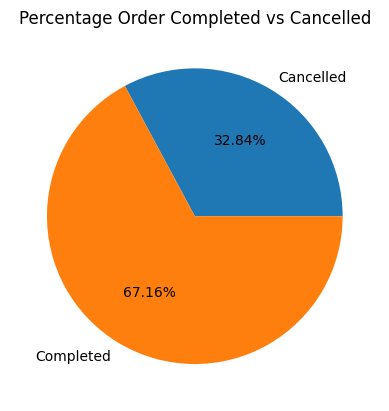

In [125]:
# Visualisasi data menggunakan pie chart
plt.pie(x=comCan['Customer ID'], labels=comCan['Order Status'], autopct='%1.2f%%')
plt.title('Percentage Order Completed vs Cancelled')
plt.show()

Dari hasil visualisasi dapat dilihat dengan mudah bahwa presentase jumlah order yang cancelled adalah 32.84% dan yang completed adalah 67.16%. Nilai 32.84% adalah nilai yang cukup besar untuk pembatalan order. Pembatalan order yang dilakukan oleh customer kemungkinan disebabkan oleh beberapa hal, salah satunya adalah total amount dengan nominal yang besar. 

Pesanan dengan nominal besar mungkin lebih rentan dibatalkan karena faktor keuangan customer. Maka, dilakukan uji statistik untuk melihat korelasi status order dengan rata-rata total amount. 

Uji statistik ini akan dilakukan dengan metode `Independent Two Sample t-Test`. Metode ini dipilih karena uji statistik ini digunakan untuk membandingkan 2 kelompok data yang independen (completed order dan cancelled order). Berikut adalah penentuan hipotesisnya:

**H0**: Tidak ada perbedaan rata-rata total amount antara Cancelled Order dan Completed Order

**H1**: Ada perbedaan rata-rata total amount antara Cancelled Order dan Completed Order

In [126]:
# Mengelompokkan data dengan status order completed 
completed = df[df['Order Status'].str.contains('Completed', case = False)]

# Mengelompokkan data dengan status order cancelled
cancelled = df[df['Order Status'].str.contains('Cancelled', case = False)]

In [127]:
# Uji Independent Two-Sample t-test
pvalue = stats.ttest_ind(completed['Total Amount'], cancelled['Total Amount']).pvalue
print('p-value:', pvalue) 

p-value: 0.6099684583529085


Dari hasil pengujian statisitk Independent Two-Sample t-test diperoleh p-value = 0.609. Dengan confidence level 95% (critical value = 0.05). Maka, p-value > critical value. Artinya H0 gagal ditolak, tidak ada perbedaan rata-rata total amount antara Cancelled Order dan Completed Order.

Maka, pembatalan order customer bukan disebabkan karena total amount. Beberapa kemungkinan penyebab lain pembatalan order customer adalah rating produk yang kurang baik, stok produk tidak ada, masalah kualitas produk, dan pengiriman lambat atau mahal.

Untuk perhitungan selanjutnya, saya akan menggunakan data penjualan yang completed saja karena ingin mendapatkan hasil analisa dari produk-produk yang benar-benar berhasil terjual ke customer.

## 4.2. Analisa Metode Pembayaran

Analisa metode pembayaran ini bertujuan untuk melihat metode pembayaran yang paling sering dipilih oleh customer dan bagaimana dengan metode pembayaran lainnya.

In [128]:
# Metode pembayaran yang paling sering digunakan
completed['Payment Method'].mode()[0]

'Credit Card'

Dari hasil perhitungan mode, diketahui bahwa customer sering menggunakan kartu kredit pada saat melakukan pembayaran. Oleh karena itu, hal ini dapat menjadi pertimbangan pemilik toko untuk bekerja sama dengan beberapa bank yang dapat memberikan cicilan 0% atau memberikan promo jika pembelian menggunakan kartu kredit. Hal ini akan mendorong customer untuk melakukan pembelian lebih banyak atau mendorong customer untuk membeli produk yang dianggap terlalu mahal.

In [129]:
# Menghitung seberapa sering transaksi menggunakan masing-masing metode pembayaran
payment = completed.groupby('Payment Method')['Customer ID'].count().sort_values().reset_index()
payment

,Payment Method,Customer ID
0,Debit Card,1684
1,Cash,1727
2,Bank Transfer,2259
3,PayPal,3863
4,Credit Card,3899


Agar lebih mudah dipahami, maka berikut visualisasi datanya:

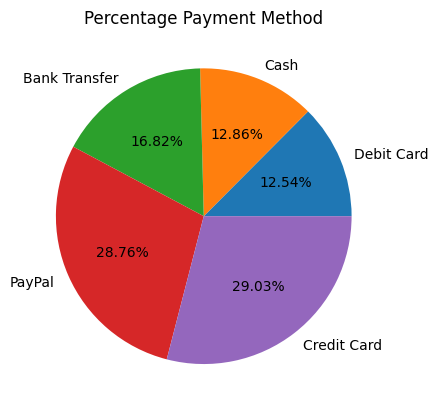

In [130]:
# Visualisasi data menggunakan pie chart
plt.pie(x=payment['Customer ID'], labels=payment['Payment Method'], autopct='%1.2f%%')
plt.title('Percentage Payment Method')
plt.show()

Dari hasil perhitungan diperoleh hasil bahwa customer paling banyak menggunakan kartu kredit untuk melakukan transaksi dan jumlahnya tidak berbeda jauh dengan penggunaan PayPal. Sehingga, hal ini dapat menjadi bahan pertimbangan untuk pemberian promo diskon, cashback dengan Credit Card atau PayPal untuk meningkatkan ketertarikan customer dan meningkatkan penjualan.

## 4.3. Analisa Metode Pengiriman

Analisa metode pengiriman ini membantu melihat metode pengiriman apa yang sering dipilih oleh customer. Hal ini dapat membantu pemilik toko agar mempertimbangkan bekerja sama dengan pihak tertentu untuk menekan biaya pengiriman, sehingga pemilik toko juga dapat memberikan biaya pengiriman yang kompetitif kepada pelanggan.

In [131]:
# Metode pengiriman yang paling sering digunakan
completed['Shipping Type'].mode()[0]

'Standard'

Dari hasil pemeriksaan, metode pengiriman yang sering digunakan adalah Standard. Berikut ini adalah perhitungan seberapa sering masing-masing shipping type dipilih oleh customer.

In [132]:
# Menghitung seberapa sering masing-masing shipping type dipilih oleh customer
shipment = completed.groupby('Shipping Type')['Customer ID'].count().sort_values().reset_index()
shipment

,Shipping Type,Customer ID
0,Same Day,2187
1,Expedited,2210
2,Express,2227
3,Overnight,2247
4,Standard,4561


Agar lebih mudah dipahami, berikut adalah visualisasinya:

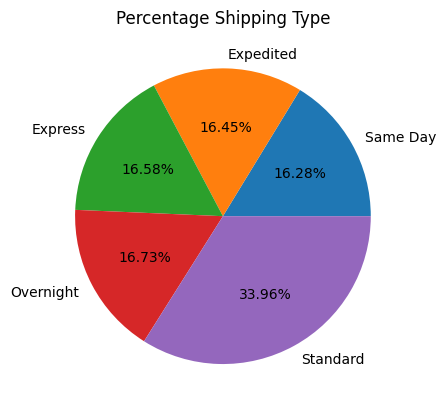

In [133]:
# Visualisasi data menggunakan pie chart
plt.pie(x=shipment['Customer ID'], labels=shipment['Shipping Type'], autopct='%1.2f%%')
plt.title('Percentage Shipping Type')
plt.show()

Dari hasil visualisasi di atas, dapat dilihat dengan mudah bahwa customer sering memilih shipping type Standard. Untuk shipping type Expedited, Same Day, Express, dan Overnight memiliki jumlah yang kurang lebih sama.

Hal ini bisa menjadi pertimbangan pemilik toko untuk bekerja sama dengan pihak jasa kirim yang melayani pengiriman Standard. Dengan memberikan volume pengiriman yang tinggi kepada pihak jasa kirim dapat menekan biaya pengiriman. Selain itu, jika biaya pengiriman dapat ditekan, pemilik toko dapat menawarkan biaya kirim yang lebih rendah ke customer, sehingga customer akan lebih tertarik dan nyaman untuk membeli. 

## 4.4. Analisa Tren Penjualan per Bulan

Perhitungan total penjualan per Bulan ini bertujuan untuk mengetahui bagaimana tren naik turunnya total penjualan setiap bulan. 

In [134]:
# Menghitung total penjualan tiap bulan
monthlySales = completed.groupby('Periode')['Total Amount'].sum().reset_index()
monthlySales

,Periode,Total Amount
0,2023-09,288973.36
1,2023-10,1581479.07
2,2023-11,1414569.83
3,2023-12,1332773.10
4,2024-01,4609532.76
5,2024-02,3977503.88
6,2024-03,4310840.58
7,2024-04,4382617.75
8,2024-05,4552289.38
9,2024-06,4550643.31


Agar lebih mudah dipahami, berikut adalah visualisasinya:

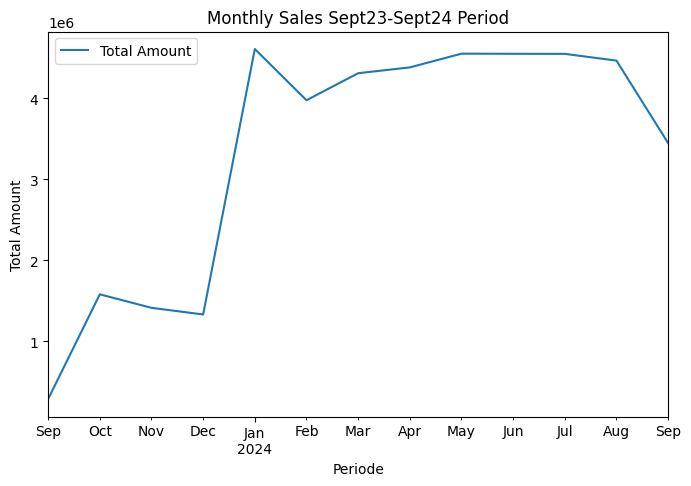

In [135]:
# Visualisasi data menggunakan linechart
monthlySales.plot(x='Periode',y='Total Amount',kind='line', figsize=(8,5))
plt.ylabel('Total Amount')
plt.title('Monthly Sales Sept23-Sept24 Period')
plt.show()

Dari hasil perhitungan total penjualan bulanan dan visualisasi data untuk periode September 2023 hingga September 2024, terlihat adanya tren penjualan yang naik-turun setiap bulan. Bulan terendah penjualannya adalah September 2023. Penjualan yang sangat rendah di bulan September 2023 kemungkinan dikarenakan data yang diterima pada periode September 2023 tidak seluruhnya.
Berikut adalah pemeriksaanya:

In [136]:
# Memeriksa tanggal terkecil di bulan september 2023
completed[completed['Periode'] == '09-2023']['Purchase Date'].min()

Timestamp('2023-09-24 00:00:00')

In [137]:
# Memeriksa tanggal terbesar di bulan september 2024
completed[completed['Periode'] == '09-2024']['Purchase Date'].max()

Timestamp('2024-09-23 00:00:00')

Dari pemeriksaan diatas, diketahui bahwa periode September 2023 record penjualannya dimulai tanggal 24 September 2023. Hal ini menjadi penyebab total penjualan bulan September 2023 sangat rendah. Dan untuk periode September 2024, record datanya hanya sampai tanggal 23 September 2024, sehingga grafik tampak turun tajam. Namun, ada kecenderungan sales menurun dari bulan Agustus 2024, sehingga hal ini harus menjadi evaluasi bagi pemilik toko untuk meningkatkan penjualan misalnya melalui promosi, memberikan bundling promo kepada customer agar dapat meningkatkan daya beli customer.

Kenaikan tertinggi penjualan ada di bulan Januari 2024, hal ini kemungkinan karena behaviour dari customer. Pada umumnya, akhir tahun adalah periode dimana banyak pekerja menerima bonus, sehingga daya beli meningkat dan mempengaruhi penjualan di bulan Januari 2024. 
 
Analisis ini memberikan peluang bagi pemilik toko untuk mengetahui penyebab turunnya penjualan di bulan tertentu dan mengidentifikasi faktor yang menyebabkan peningkatan penjualan di bulan lainnya. Dengan memahami ini, pemilik toko dapat merancang strategi yang lebih baik untuk meningkatkan penjualan di periode mendatang, seperti:
- Melakukan promosi pada bulan dengan penjualan rendah
- Mengoptimalkan stok barang berdasarkan tren permintaan 
- Melakukan evaluasi strategi pemasaran untuk memaksimalkan potensi pendapatan.

## 4.5. Analisa Tren Penjualan per Kategori Produk

Analisa ini bertujuan untuk menganalisa tren penjualan per kategori produk selama periode September 2023-September 2024.

Berikut ini adalah total penjualan per kategori produk dalam periode September 2023 - September 2024:

In [138]:
# Total penjualan per kategori produk 
amountSalesbyCategory = completed.groupby('Product Type')['Total Amount'].sum().reset_index()
amountSalesbyCategory

,Product Type,Total Amount
0,Headphones,2847454.72
1,Laptop,8536583.03
2,Smartphone,14630325.53
3,Smartwatch,9557416.02
4,Tablet,7893431.51


Untuk kuantiti terjual per kategori produk periode September 2023 - September 2024 sebagai berikut:

In [139]:
# Total kuantiti terjual per kategori produk
qtySoldbyCategory = completed.groupby('Product Type')['Quantity'].sum().reset_index()
qtySoldbyCategory

,Product Type,Quantity
0,Headphones,7565
1,Laptop,14623
2,Smartphone,21947
3,Smartwatch,14474
4,Tablet,15041


Agar lebih mudah dipahami, berikut ini adalah visualisasi datanya:

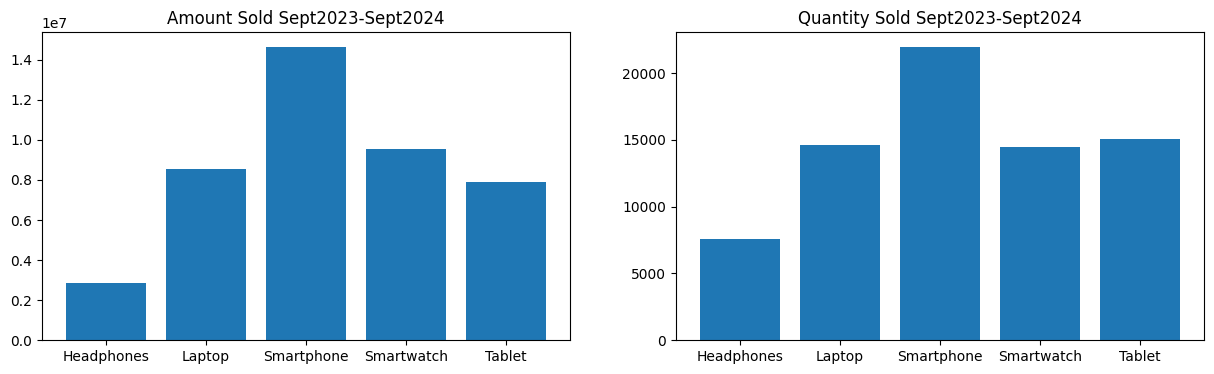

In [140]:
# Visualisasi data
fig, axes = plt.subplots(ncols=2, figsize=(15,4))

x1 = amountSalesbyCategory['Product Type']
y1 = amountSalesbyCategory['Total Amount']

x2 = qtySoldbyCategory['Product Type']
y2 = qtySoldbyCategory['Quantity']

axes[0].bar(x1,y1)
axes[1].bar(x2,y2)

axes[0].set_title("Amount Sold Sept2023-Sept2024")
axes[1].set_title("Quantity Sold Sept2023-Sept2024")

plt.show()


Dari perhitungan total penjualan per kategori produk dan kuantiti terjual per kategori produk, diperoleh informasi bahwa Smartphone mendominasi penjualan. Selama periode September 2023 - September 2024 kategori Smartphone terjual sebanyak 21.947 unit dengan total penjualan 14.630.325 dollar. 

Smartphone memiliki permintaan yang paling tinggi dibandingkan kategori produk lainnya. 

Untuk produk Smartwatch, kuantiti terjualnya sebanyak 14474 unit dalam 1 tahun, lebih rendah dibandingkan Laptop dan Tablet namun, total penjualannya termasuk yang tertinggi setelah Smartphone. Hal ini dapat disebabkan karena harga satuan Smartwatch lebih tinggi dibandingkan Tablet dan Laptop.

Headphone memiliki kontribusi penjualan yang paling rendah, hal ini mungkin disebabkan karena persaingan harga atau bisa terjadi karena produk ini hanya dianggap sebagai aksesoris tambahan oleh customer.

Selanjutnya, untuk membantu pemilik toko mengoptimalkan stok setiap bulannya, berikut ini adalah tren penjualan produk setiap bulan berdasarkan kategori produknya dan rata-rata terjual setiap bulannya.


In [141]:
# Menghitung jumlah penjualan produk setiap kategori setiap bulan
qtySoldperMonthCat = completed.groupby(['Periode', 'Product Type'])['Quantity'].sum().reset_index()
qtySoldperMonthCat.head(10)

,Periode,Product Type,Quantity
0,2023-09,Laptop,124
1,2023-09,Smartphone,168
2,2023-09,Smartwatch,126
3,2023-09,Tablet,227
4,2023-10,Laptop,678
5,2023-10,Smartphone,1352
6,2023-10,Smartwatch,622
7,2023-10,Tablet,736
8,2023-11,Laptop,595
9,2023-11,Smartphone,1275


Agar lebih mudah dipahami, berikut adalah visualisasi datanya:

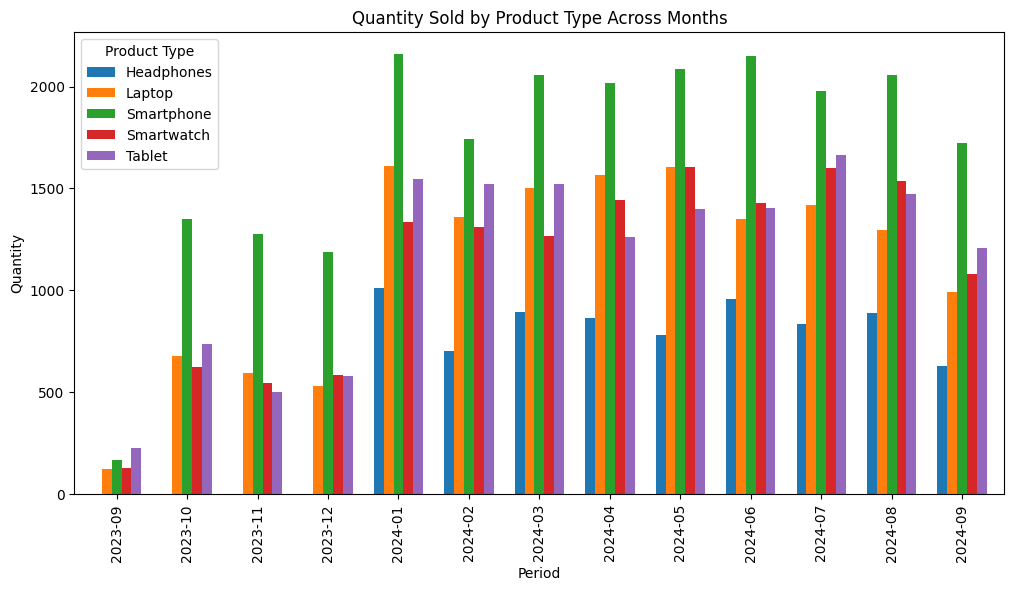

In [142]:
# Visualisasi data jumlah terjual setiap bulan per kategori
pivot = qtySoldperMonthCat.pivot(index='Periode', columns='Product Type', values='Quantity')

pivot.plot(kind='bar', figsize=(12, 6), width=0.7)

plt.title('Quantity Sold by Product Type Across Months')
plt.xlabel('Period')
plt.ylabel('Quantity')
plt.legend(title='Product Type')

plt.show()

Dari data diatas diperoleh informasi bagaimana tren produk terjual setiap bulan per kategori produknya. Untuk kategori Headphone baru terjual di bulan Januari 2024. Hal ini kemungkinan dikarenakan Headphone adalah kategori produk baru.

Selanjutnya, dapat dihitung rata-rata penjualan tiap kategori produk setiap bulan. Hal ini dapat membantu pemilik toko untuk mengoptimalkan stok barang berdasarkan kategori setiap bulannya.

In [143]:
# Menghitung rata-rata terjual setiap kategori setiap bulan
avgSoldperMonthCat = qtySoldperMonthCat.groupby(['Product Type'])['Quantity'].mean().reset_index()
avgSoldperMonthCat

,Product Type,Quantity
0,Headphones,840.555556
1,Laptop,1124.846154
2,Smartphone,1688.230769
3,Smartwatch,1113.384615
4,Tablet,1157.000000


## 4.6. Analisa Total Penjualan berdasarkan Gender

Pada bagian ini akan dilakukan analisa total penjualan berdasarkan Gender customer. Seperti yang sudah di analisis sebelumnya, untuk kategori Gender ada Female, Male, dan Unknown. Unknown adalah customer yang tidak memberikan info Gendernya. Berikut ini adalah perhitungan jumlah customer dengan masing-masing Gender:

In [144]:
# Menghitung jumlah Customer berdasarkan Gender
uniqueCustomers = completed.drop_duplicates(subset='Customer ID').reset_index()
genderCounts = uniqueCustomers['Gender'].value_counts().reset_index()
genderCounts

,Gender,count
0,Male,4823
1,Female,4642
2,Unknown,1


Karena jumlah Unknown hanya 1 dari data customer yang ordernya Completed. Maka akan dilakukan penghapusan Gender Unknown pada analisa ini.

In [145]:
genderCounts.drop(index=2, inplace=True)
genderCounts

,Gender,count
0,Male,4823
1,Female,4642


Agar lebih jelas dan mudah dipahami persentase Female dan Malenya, berikut adalah visualisasinya:

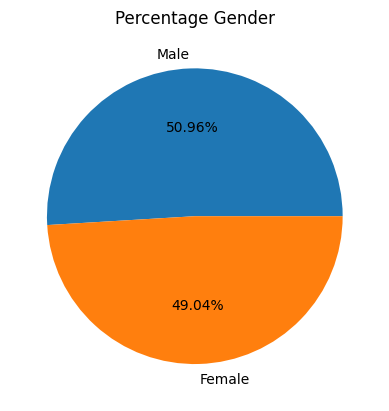

In [146]:
# Visualisasi data menggunakan pie chart
plt.pie(x=genderCounts['count'], labels=genderCounts['Gender'], autopct='%1.2f%%')
plt.title('Percentage Gender')
plt.show()

Dari visualisasi diatas dapat diketahui bahwa dari seluruh customer yang berhasil melakukan transaksi, 50.96% diantaranya adalah Male dan 49.04% Female.

Berikut ini adalah total spending dari masing-masing Gender. Hal ini untuk mengetahui apakah Gender mempengaruhi penjualan toko.

In [147]:
#  Menghitung total penjualan berdasarkan gender 
amountSoldbyGender = completed.groupby('Gender')['Total Amount'].sum().sort_values().reset_index()

# Menghapus Gender Unknown
amountSoldbyGender.drop(index=0, inplace=True)
amountSoldbyGender

,Gender,Total Amount
1,Female,21680728.41
2,Male,21783808.08


Berikut adalah visualisasi datanya:

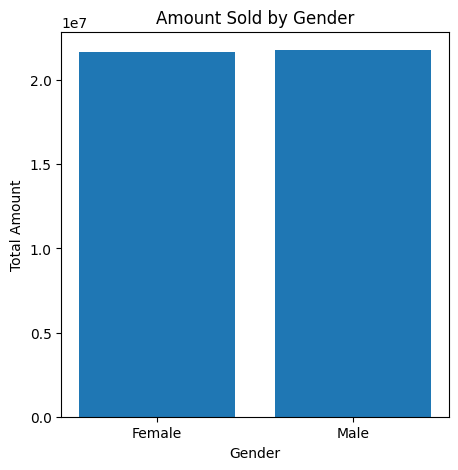

In [148]:
# Visualisasi data 
plt.figure(figsize=(5,5))
plt.bar(amountSoldbyGender['Gender'], amountSoldbyGender['Total Amount'])

plt.title('Amount Sold by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Amount')
plt.show()

Berdasarkan total penjualan, gender Male dan Female melakukan pembelian dengan total spending yang kurang lebih sama meskipun Male melakukan pembelian yang agak sedikit lebih banyak daripada Female. 

Dari visualisasi diatas dapat diperoleh informasi bahwa tidak ada gender yang berkontribusi dominan pada total penjualan. Sehingga, strategi pemasaran dapat dilakukan dengan target yang general.

## 4.7. Analisa Rata-Rata Penjualan per Bulan

Analisa ini dilakukan untuk mengetahui rata-rata penjualan per bulan mulai dari September 2023-September 2024.

In [149]:
# Menghitung rata-rata penjualan per bulan
totalAmountYear = completed['Total Amount'].sum()
averageSalesperMonth = totalAmountYear/12

print(f"Rata-rata Penjualan per Bulan: {averageSalesperMonth}")

Rata-rata Penjualan per Bulan: 3622100.9008333334


Rata-rata penjualan toko per bulan adalah 3.622.100.

## 4.8. Analisa Usia Customer

Analisa ini dilakukan untuk mengetahui bagaimana usia customer sehingga dapat dilakukan strategi pemasaran yang tepat untuk meningkatkan penjualan dan update produk baru sesuai dengan usia kebutuhan customer.

In [150]:
# Menghitung nilai mean, median, mode kolom Age
meanAge = completed['Age'].mean()
medianAge = completed['Age'].median()
modeAge = completed['Age'].mode()
maxAge = completed['Age'].max()
minAge =completed['Age'].min()
rangeAge = maxAge - minAge

print(f"Mean Age: {meanAge:.2f}")
print(f"Median Age: {medianAge:.2f}")
print(f"Mode Age: {modeAge[0]:.2f}")
print(f"Min Age: {minAge}")
print(f"Max Age: {maxAge}")
print(f"Range Age: {rangeAge}")

Mean Age: 48.97
Median Age: 49.00
Mode Age: 61.00
Min Age: 18
Max Age: 80
Range Age: 62


In [ ]:
# Menghitung standar deviasi, skewness, dan kurtosis
stdAge = completed['Age'].std()
skewAge = completed['Age'].skew()
kurtosisAge = completed['Age'].kurtosis()

print(f"Standar Deviasi Age: {stdAge:.2f}")
print(f"Skewness Age: {skewAge:.2f}")
print(f"Kurtosis Age: {kurtosisAge:.2f}")

Standar Deviasi Age: 18.06
Skewness Age: 0.01
Kurtosis Age: -1.20


Dari perhitungan central tendency usia customer, diperoleh bahwa rata-rata usia customer adalah 48.97 tahun dan banyak customer yang berusia 61 tahun. Customer termuda dengan usia 18 tahun dan customer tertua dengan usia 80 tahun.

Untuk distribusi data usia customer hampir simetris dilihat dari nilai skewness yang mendekati 0.

Nilai kurtosis -1.20 menunjukkan bahwa data memiliki puncak yang lebih rendah dibandingkan distribusi normal.

Penyebaran data cenderung sedang (standard deviasi 18.06) dibandingkan dengan rata-rata umur customer yaitu 48.97. 

Berikut ini adalah visualisasi datanya:

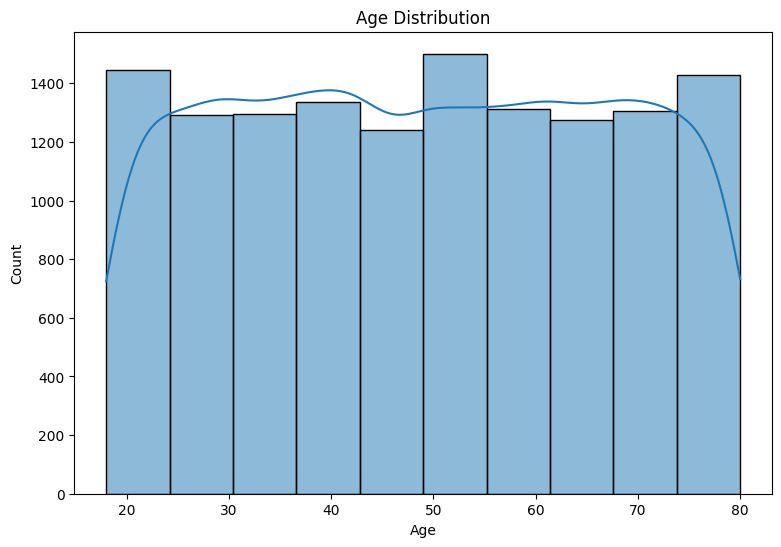

In [152]:
# Visualisasi menggunakan histogram
plt.figure(figsize=(9,6))
sns.histplot(completed['Age'], bins=10, kde=True)
plt.title('Age Distribution')
plt.show()

Hal ini dapat membantu pemilik toko memilih strategi pemasaran yang tepat untuk meningkatkan penjualan dan update produk baru sesuai dengan usia kebutuhan customer. Misalnya dengan menawarkan produk dengan fitur yang mudah digunakan, daya tahan yang kuat.

## 4.9 Analisa Rating Products

Analisa ini membantu pemilik toko untuk meningkatkan kualitas produk yang dijual berdasarkan rating yang diberikan customer. Berikut ini adalah perhitungan rating rata2 tiap kategori produk.

In [153]:
# Rating per Kategori Product
ratingCategory = completed.groupby("Product Type")['Rating'].mean().sort_values().reset_index()
ratingCategory

,Product Type,Rating
0,Laptop,2.974311
1,Headphones,2.991918
2,Smartwatch,3.000379
3,Tablet,3.028051
4,Smartphone,3.327672


Agar lebih mudah dipahami, berikut adalah visualisasi datanya:

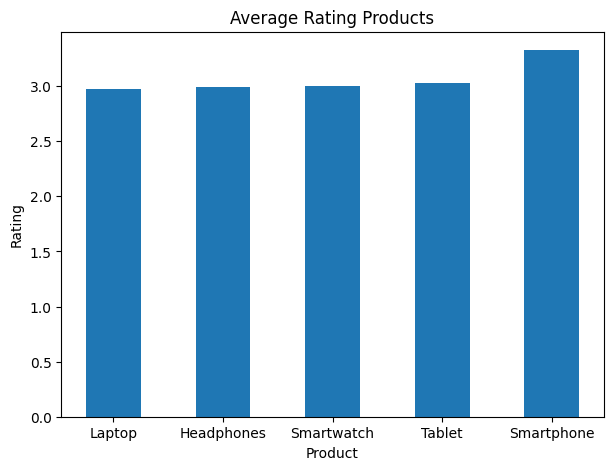

In [154]:
# Visualisasi data
plt.figure(figsize=(7,5))
plt.bar(ratingCategory['Product Type'],ratingCategory['Rating'], width=0.5)
plt.title('Average Rating Products')
plt.xlabel('Product')
plt.ylabel('Rating')
plt.show()

Berdasarkan kategori products, kategori Smartphone memiliki rating tertinggi, walaupun untuk setiap kategori produk ratingnya sekitar 3 dari 5(rating maksimum). Untuk kategori Laptop memiliki rating terendah namun masih di angka 2.97 artinya berdasarkan penilaian pelanggan kategori Laptop masih tidak terlalu memuaskan dan tidak terlalu buruk. Hal ini dapat menjadi evaluasi bagi pemilik toko untuk mencari produk dengan kualitas yang lebih baik agar dapat menarik lebih banyak pelanggan dan mempertahankan customer yang sudah ada.

## 4.10. Analisa Pembelian Add-On

Analisa ini membantu pemilik toko untuk mengetahui Add-On yang sering di beli oleh customer sehingga, pemilik toko dapat mengoptimalkan stok dan mempersiapkan hal-hal yang diperlukan. Untuk jenis add-on yang ditawarkan kepada customer diantaranya adalah Accessory, Extended Warranty, Impulse Item.

Sebelumnya, kolom add-on dipecah menjadi 3 kolom, maka, akan dihitung jumlah add-on masing-masing kolom dan ditotal secara keseluruhan.

In [155]:
# Menghitung Add-on1
addOn1 = completed.groupby("Add-on1")['Customer ID'].count().reset_index()
addOn1

,Add-on1,Customer ID
0,Accessory,3371
1,Extended Warranty,3347
2,Impulse Item,3427
3,None,3287


In [156]:
# Menghitung Add-on2
addOn2 = completed.groupby("Add-on2")['Customer ID'].count().reset_index()
addOn2

,Add-on2,Customer ID
0,Accessory,2230
1,Extended Warranty,2224
2,Impulse Item,2340
3,None,6638


In [157]:
# Menghitung Add-on3
addOn3 = completed.groupby("Add-on3")['Customer ID'].count().reset_index()
addOn3

,Add-on3,Customer ID
0,Accessory,1112
1,Extended Warranty,1142
2,Impulse Item,1121
3,None,10057


In [158]:
# Menggabungkan hasil perhitungan Add-on1, Add-on2 dan Add-on3
combined = pd.merge(addOn1, addOn2, how='outer', left_on="Add-on1", right_on="Add-on2")
combined = pd.merge(combined, addOn3, how='outer', left_on="Add-on1", right_on="Add-on3")
combined

,Add-on1,Customer ID_x,Add-on2,Customer ID_y,Add-on3,Customer ID
0,Accessory,3371,Accessory,2230,Accessory,1112
1,Extended Warranty,3347,Extended Warranty,2224,Extended Warranty,1142
2,Impulse Item,3427,Impulse Item,2340,Impulse Item,1121
3,None,3287,None,6638,None,10057


In [159]:
# Menghapus kolom Add-on2 dan Add-on3
combined.drop(['Add-on2','Add-on3'], axis =1, inplace=True)
combined

,Add-on1,Customer ID_x,Customer ID_y,Customer ID
0,Accessory,3371,2230,1112
1,Extended Warranty,3347,2224,1142
2,Impulse Item,3427,2340,1121
3,None,3287,6638,10057


In [160]:
# Menghapus baris None(tidak ada pembelian Add-on)
combined.drop(index=3, inplace=True)

In [161]:
# Membuat kolom baru total masing-masing Add-on
combined['Total Qty Addon'] = combined['Customer ID'] + combined['Customer ID_x'] + combined['Customer ID_y']
combined

,Add-on1,Customer ID_x,Customer ID_y,Customer ID,Total Qty Addon
0,Accessory,3371,2230,1112,6713
1,Extended Warranty,3347,2224,1142,6713
2,Impulse Item,3427,2340,1121,6888


In [162]:
# Menghapus kolom yang tidak diperlukan
combined.drop(['Customer ID_x','Customer ID_y',  'Customer ID'], axis =1, inplace=True)
combined

,Add-on1,Total Qty Addon
0,Accessory,6713
1,Extended Warranty,6713
2,Impulse Item,6888


Dari data diatas diperoleh jumlah quantity Add-On yang terjual selama 1 tahun. Berikut visualisasinya:

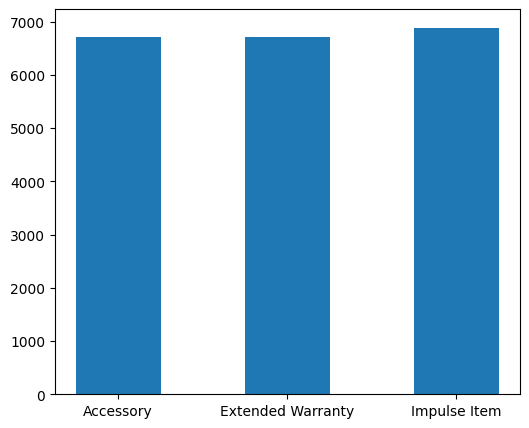

In [163]:
# Visualisasi data
plt.figure(figsize=(6,5))
plt.bar(combined['Add-on1'], combined['Total Qty Addon'], width=0.5)
plt.show()

Jumlah antara masing-masing add-on kurang lebih sama terjualnya dalam setahun.

## 4.11. Korelasi Kategori Usia dan Kategori Produk

Analisis ini bertujuan untuk menentukan apakah terdapat hubungan antara kategori usia dan kategori produk. Tujuannya adalah untuk mengidentifikasi kecenderungan pelanggan dari kategori usia tertentu dalam membeli produk tertentu. Jika ditemukan adanya korelasi, hasil ini dapat membantu pemilik toko merancang strategi pemasaran dan penjualan yang lebih tepat sasaran.

Untuk usia customer akan dikategorikan ke dalam kategori berikut:

- <50 tahun = Younger Group
- '>= 50 tahun = Older Group

In [164]:
# Looping dan kondisional untuk entry data kategori usia
keteranganUsia = []
for i in completed['Age']:
    if  i < 50 :
      keteranganUsia.append('Younger Group')
    elif i >= 50:
      keteranganUsia.append('Older Group')

# Membuat kolom keterangan usia dan mengisi data kategori usia dari hasil looping
completed['Age Category'] = keteranganUsia
completed.head(10)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_9488\3312559084.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  completed['Age Category'] = keteranganUsia


,Customer ID,Age,Gender,Loyalty Member,Product Type,SKU,Rating,Order Status,Payment Method,Amount Product,...,Quantity,Purchase Date,Shipping Type,Amount Add-on,Total Amount,Add-on1,Add-on2,Add-on3,Periode,Age Category
1,1000,53,Male,No,Tablet,SKU1002,3,Completed,PayPal,741.09,...,3,2024-04-20,Overnight,26.09,767.18,Impulse Item,None,None,2024-04,Older Group
2,1002,41,Male,No,Laptop,SKU1005,3,Completed,Credit Card,1855.84,...,4,2023-10-17,Express,0.00,1855.84,None,None,None,2023-10,Younger Group
3,1002,41,Male,Yes,Smartphone,SKU1004,2,Completed,Cash,3164.76,...,4,2024-08-09,Overnight,60.16,3224.92,Impulse Item,Impulse Item,None,2024-08,Younger Group
4,1003,75,Male,Yes,Smartphone,SKU1001,5,Completed,Cash,41.50,...,2,2024-05-21,Express,35.56,77.06,Accessory,None,None,2024-05,Older Group
5,1004,41,Female,No,Smartphone,SKU1001,5,Completed,Credit Card,83.00,...,4,2024-05-26,Standard,65.78,148.78,Impulse Item,Accessory,None,2024-05,Younger Group
6,1005,25,Female,No,Smartwatch,SKU1003,3,Completed,PayPal,7603.47,...,9,2024-01-30,Overnight,0.00,7603.47,None,None,None,2024-01,Younger Group
7,1005,25,Female,No,Laptop,SKU1005,3,Completed,Debit Card,4175.64,...,9,2024-06-24,Overnight,75.33,4250.97,Extended Warranty,Extended Warranty,None,2024-06,Younger Group
9,1006,24,Male,Yes,Laptop,SKU1005,3,Completed,Cash,4175.64,...,9,2024-01-01,Express,0.00,4175.64,None,None,None,2024-01,Younger Group
10,1006,24,Male,Yes,Tablet,SKU1002,3,Completed,PayPal,2470.30,...,10,2024-06-25,Overnight,90.38,2560.68,Impulse Item,Accessory,Impulse Item,2024-06,Younger Group
12,1008,66,Female,No,Smartwatch,SKU1003,3,Completed,Cash,3379.32,...,4,2023-09-25,Express,65.85,3445.17,Extended Warranty,Impulse Item,Extended Warranty,2023-09,Older Group


Setelah diperoleh Age Category, analisis akan dilakukan menggunakan Chisquare. Metode Chisquare dipilih karena akan diperiksa hubungan antara 2 kategori, yaitu kategori usia dan kategori produk. Oleh karena itu penentuan hipotesisnya adalah sebagai berikut:

H0: Tidak ada hubungan antara kategori produk dan kategori usia

H1: Ada hubungan antara kategori produk dan kategori usia


In [165]:
# Contingency Table
contingencyTable = pd.crosstab(completed['Age Category'], completed['Product Type'])
contingencyTable

Product Type,Headphones,Laptop,Smartphone,Smartwatch,Tablet
Age Category,,,,,
Older Group,646,1300,1955,1339,1353
Younger Group,715,1386,2049,1297,1392


In [166]:
result = stats.chi2_contingency(contingencyTable)
print("p-value:",result.pvalue)

p-value: 0.26950038106317986


Dengan Confidence Level 95% (critical value = 0.05) maka, p-value > 0.05. Artinya, gagal menolak H0 dan tidak ada hubungan antara kategori produk dan kategori usia. Oleh karena itu, dapat dilakukan pendekatan strategi pemasaran yang lebih general untuk menjangkau semua usia, bersifat universalh dan tidak segmentatif.

## 4.12. Korelasi Loyalty Member dengan Total Spending

Analisis ini bertujuan untuk memahami hubungan antara rata-rata pembelian customer dengan status loyalty member. Apakah terdapat perbedaan yang signifikan dalam rata-rata pengeluaran antara pelanggan yang mmerupakan member dan yang bukan member. Hasil dari analisis ini dapat memberikan informasi kepada pemilik toko untuk mengevaluasi efektivitas program customer loyalty, sekaligus membantu merancang strategi promosi atau insentif yang lebih efektif untuk meningkatkan penjualan, baik untuk member maupun non-member.

Untuk analisa ini dilakukan pengujian statistik dengan metode `Independent Two-Sampel t-Test`. Metode ini dipilih karena membandingkan total spending antara customer dengan loyalty member dan tanpa loyalty member. Penentuan hipotesisnya adalah sebagai berikut:

**H0**: Tidak ada perbedaan rata-rata total spending antara customer dengan loyalty member dan customer tanpa loyalty member

**H1**: Ada perbedaan rata-rata total spending antara customer dengan loyalty member dan customer tanpa loyalty member

In [167]:
# Mengelompokkan spending customer dengan loyalty member
yes = completed[completed['Loyalty Member'].str.contains('yes', case = False)]

# Mengelompokkan spending customer tanpa loyalty member
no = completed[completed['Loyalty Member'].str.contains('no', case = False)]

In [168]:
# Uji Independent Two-Sample t-test
pvalue = stats.ttest_ind(yes['Total Amount'], no['Total Amount']).pvalue
print('p-value:', pvalue) 

p-value: 0.16952063428436467


Dari hasil pengujian statistik, dengan confidence interval 95%(critical value: 0.05) maka, p-value > critical value. 

Maka, hasilnya adalah gagal menolak H0. Tidak ada perbedaan antara rata-rata total spending customer dengan loyalty member dan customer tanpa loyalty member.

Hal ini mengindikasikan bahwa program loyalty member perlu di evaluasi ulang dengan memastikan bahwa benefit loyalty member benar-benar menguntungkan dan dipahami oleh customer. Selain itu perlu dipastikan ulang apakah keuntungan menjadi member cukup menarik bagi customer. Keuntungan yang dapat diberikan seperti diskon eksklusif, poin reward, atau cashback.

# 5. Kesimpulan

Dari hasil analisa dan perhitungan yang sudah dilakukan diperoleh informasi bahwa:

- Presentase jumlah order yang cancelled adalah 32.84% dan yang completed adalah 67.16%. Pembatalan order kemungkinan disebabkan oleh beberapa hal, salah satunya adalah total amount dengan nominal yang besar. Namun, setelah dilakukan uji statistik, diperoleh data bahwa tidak cukup bukti untuk menolak H0 yang artinya tidak ada perbedaan rata-rata spending antara customer yang melakukan pembatalan order dan yang ordernya berhasil selesai. Sehingga kemungkinan customer order bukan disebabkan oleh total amount yang tinggi.

- Metode pembayaran yang sering dipilih oleh customer adalah Credit Card dan PayPal. Sehingga, hal ini dapat menjadi bahan pertimbangan untuk pemberian promo diskon, cashback dengan Credit Card atau PayPal untuk meningkatkan ketertarikan customer dan meningkatkan penjualan.

- Metode pengiriman yang paling sering dipilih oleh customer adalah Standard. Hal ini bisa menjadi pertimbangan pemilik toko untuk bekerja sama dengan pihak jasa kirim yang melayani pengiriman Standard. Dengan memberikan volume pengiriman yang tinggi kepada pihak jasa kirim dapat menekan biaya pengiriman. Selain itu, jika biaya pengiriman dapat ditekan, pemilik toko dapat menawarkan biaya kirim yang lebih rendah ke customer, sehingga customer akan lebih tertarik dan nyaman untuk membeli. 

- Tren penjualan memiliki kenaikan tertinggi di awal tahun, hal ini kemungkinan disebabkan karena banyak pekerja yang mendapatkan bonus akhir tahun sehingga daya beli meningkat. Hal ini dapat menjadi pertimbangan pemilik toko untuk memberikan promo dan menjual produk baru. Sedangkan di Agustus 2024 grafik memiliki tren menurun, sehingga perlu menjadi evaluasi pemilik toko untuk meningkatkan penjualan misalnya dengan melakukan promosi, memberikan promo bundling menuju akhir tahun.

- Tren penjualan tiap kategori produk periode September 2023-September 2024 diperoleh informasi bahwa Smartphone mendominasi penjualan. Hal ini membantu pemilik toko untuk mengoptimalkan stok produk. Sehingga dapat menghindari kemungkinan pembatalan order karna barang kosong.

- Tidak ada perbedaan total spending antar Gender. Sehingga target pemasaran dapat dilakukan dengan lebih general

- Rata-rata penjualan toko per bulan adalah 3.622.100 dollar.

- Dari perhitungan distribusi usia customer diperoleh informasi bahwa rata-rata usia customer adalah 48-49 tahun dan banyak customer yang melakukan pembelian di usia 61 tahun. Hal ini dapat meembantu pemilik toko memilih strategi pemasaran yang tepat untuk meningkatkan penjualan dan update produk baru sesuai dengan usia kebutuhan customer. Misalnya dengan menawarkan produk dengan fitur yang mudah digunakan, daya tahan yang kuat.

- Untuk rating tiap kategori produk masih di sekitar 3 dari 5. Artinya penilaian produk berdasarkan customer masih biasa saja. Hal ini dapat menjadi evaluasi bagi pemilik toko untuk mencari produk dengan kualitas yang lebih baik agar dapat menarik lebih banyak pelanggan dan mempertahankan customer yang sudah ada.

- Add-on yang dipilih oleh customer tidak memiliki perbedaan signifikan antara jumlahnya. 

- Tidak ada hubungan antara kategori produk dan kategori usia. Oleh karena itu, dapat dilakukan pendekatan strategi pemasaran yang lebih general untuk menjangkau semua usia, bersifat universalh dan tidak segmentatif.

- Tidak ada perbedaan antara rata-rata total spending customer dengan loyalty member dan customer tanpa loyalty member. Sehingga, program loyalty member perlu di evaluasi ulang dan dipastikan bahwa benefit loyalty member benar-benar menguntungkan dan dipahami oleh customer. Selain itu perlu dipastikan ulang apakah keuntungan menjadi member cukup menarik bagi customer. Keuntungan yang dapat diberikan seperti diskon eksklusif, poin reward, atau cashback.
